# Data Modeling - Classification - Exercise #3
In this exercise you will get some hands-on experience with applying SVM to classification problems. You will also practice with using kernels to achieve linear separability in a higher dimension, to better understand how SVM can be used for nonlinear classification.

## Part 1: Loading Data and Linear SVM

**Questions:**

1. Load the data from `svm_data.csv` into a Pandas DataFrame. There are three datasets with target `y`. How many rows are in each dataset? What are the independent variables (features) in the dataset? What values can the target take?
2. Display a scatterplot for each dataset (1-3) SEPARATELY. The independent variables should be the x and y values, and the target should be reflected as the color of the points. Include titles and legends/colorbars. Hint: Use Matplotlib/Pandas `scatter(..., c=...)`.
3. Which (if any) if datasets 1-3 are linearly separable?
4. For each of datasets 1-3, do the following:
  * Create a linear SVM classification model with `sklearn.svm.LinearSVC`
  * Train the model to predict the target `y` using input features `x1` and `x2`
  * Report the **train set accuracy** of your classifier (we are using all the data as training data)
5. Explain how your results in the previous question relate to your answer to question 3.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures


In [2]:
#1.

df = pd.read_csv('svm_data.csv')


In [3]:
df.head()

,x1,x2,y,dataset
0,0.488135,1.778165,-1,1
1,2.151894,-2.299920,1,1
2,1.027634,2.351940,-1,1
3,0.448832,4.621885,-1,1
4,-0.763452,-2.512469,1,1


In [4]:
df.dataset.value_counts()

1    100
2    100
3    100
Name: dataset, dtype: int64

In [5]:
df.y.value_counts()

 1    181
-1    119
Name: y, dtype: int64

In each dataset, we have 100 rows.

The features are x1 and x2.

The target can take 2 values : 1 and -1.



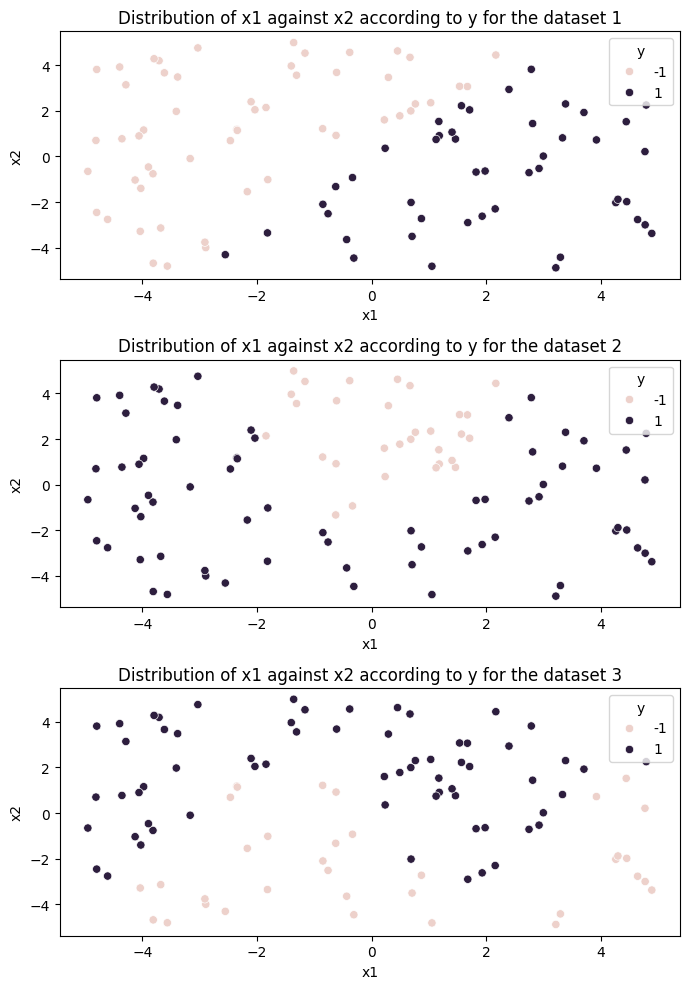

In [6]:
#2.
f,axes = plt.subplots(3,1,figsize = (7,10))
for i in range(1,4):
  sns.scatterplot(data = df[df.dataset == i], x = 'x1',y = 'x2',hue = 'y', ax = axes[i - 1])
  axes[i - 1].set(title = f'Distribution of x1 against x2 according to y for the dataset {i}')

plt.tight_layout()
plt.show()



3.

The dataset 1 is linearly separable.

In [7]:
#4.
acc = []
for i in range(1,4):
  model = LinearSVC()
  model.fit(df[df.dataset == i][['x1','x2']], df[df.dataset == i]['y'])
  y_pred = model.predict(df[df.dataset == i][['x1','x2']])
  acc.append(accuracy_score(y_pred,df[df.dataset == i]['y']))

acc

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[1.0, 0.77, 0.83]

5.

On question 3, we saw that the dataset 1 is linearly separable so the accuracy score is 1 as the data can be perfectly separated by a hyperplane.

None of the other dataset is linearly separable so we get a lower accuracy for those one.

## Part 2: The "Kernel Trick"

**Questions:**

6. Show that the data $x=(x_1,x_2)\in\mathbb{R}^2$ from dataset 2 was labelled using the function

$$
y = \text{sign}(x_1^2 - x_2 - 2)
$$

Note: The **sign function** is defined as $\text{sign}(x) = \begin{cases} -1 & x < 0 \\ 0 & x = 0 \\ 1 & x > 0 \end{cases}$.

7. Use a polynomial transformation into a higher dimensional space, with a polynomial degree 2, and write down a separating hyperplane **in that higher dimension** such that all the samples will be classified correctly. That is, find vector $w \in \mathbb{R}^5$ and scalar $b \in \mathbb{R}$ such that
$$
\forall(x,y):\,\,\,\text{sign}(w^T\phi(x)+b)=y
$$
where
$$
\phi(x)=\phi(x_1,x_2)=(x_1, x_2, x_1^2, x_2^2, x_1x_2)
$$

  Note that the solution is SIMPLE and involves comparing the known label y with the equation of the hyperplane. Considering the definition of $\phi(x)$ the solution is quite straightforward - no need to use fancy math.


8. Show that the data $x=(x_1,x_2)\in\mathbb{R}^2$ from dataset 3 was labelled using the function
$$
y = \text{sign}(5\sin(x_1) + 2 x_2 + 1)
$$

9. Similarly to question 7, find the separating hyperplane for dataset 3 in the higher dimensional space defined by

$$\phi(x) = \phi(x_1, x_2) = (x_1, x_2, \cos(x_1), \sin(x_1), \cos(x_2), \sin(x_2))$$

In [8]:
#6.
sign_func = df[df.dataset == 2]['x1']**2 - df[df.dataset == 2]['x2'] - 2
def sign_func_val(value):
  if value < 0:
    return -1
  elif value == 0:
    return 0
  else:
    return 1
sign_x = sign_func.apply(sign_func_val)

In [9]:
assert sign_x.all() == df[df.dataset == 2]['y'].all()

The assert does not show any error so the data from dataset 2 was labelled using the given sign function.

In [10]:
#7.
poly = PolynomialFeatures(2)
transformed_poly = pd.DataFrame(poly.fit_transform(df.drop(columns = ['y','dataset']))[:,1:], columns = ['x1','x2','x1sq','x2sq','x1x2'])
new_poly = pd.concat([transformed_poly,df[['y','dataset']]], axis = 1)

In [11]:
sign_func = new_poly['x1sq'] - new_poly['x2'] - 2
sign_x_poly = sign_func.apply(sign_func_val)

In [12]:
assert sign_x_poly.all() == new_poly.y.all()

So w = (0,-1,1,0,0) and b = -2

In [13]:
#8.

sign_func_sin = 5 * df[df.dataset == 3]['x1'].apply(np.sin) + 2 * df[df.dataset == 3]['x2'] + 1
sign_x_sin = sign_func_sin.apply(sign_func_val)

In [14]:
assert sign_x_sin.all() == df[df.dataset == 3]['y'].all()

So the data from dataset 3 was labelled using the function 𝑦=sign(5sin(𝑥1)+2𝑥2+1)

9.

Similarly to q7, we get w = (0,2,5,0,0) and b = 1.

## Part 3: RBF Kernel and Support Vectors

Using the results above, we know that all three datasets have a separating hyperplane in a higher dimensional space.

In this part, we will use an SVM classifier with the **Radial Basis Function (RBF) Kernel)** on each dataset. We will see how this lets us learn a nonlinear classifier in the original feature space, and also examine its support vectors.

**Questions:**
10. Repeat question 4 but instead using `sklearn.svm.SVC(...)` with a RBF kernel (this is the default kernel used, see the `kernel=` argument in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)). Use parameter `C=100` so that it is (nearly) hard-margin SVM. Briefly explain your results.
11. Repeat the previous question but instead using parameter `C=1` (soft-margin SVM). Briefly explain the difference in results.
12. Use the provided `plot_svm_results(...)` function to plot the results of the models from questions 10 and 11 **trained and evaluated on dataset 3**. Explain how you can see the results of the previous two questions in the plots.

13. The support vectors of your model are displayed with 'x' markers. Try training hard-margin (`C=100`) SVM with RBF kernel on **the first 10 samples of dataset 3** and plot the results. How does the number of support vectors change? What about the percentage of the samples that are support vectors? Give an explanation for your observations.



In [15]:
### CODE FOR QUESTIONS 12-13 ###

def plot_svm_results(model, X, y):
  """
  Plot results of an SVM model, where 'model' is a trained sklearn SVM model
  (SVC(...) with .fit(...) already applied), and X and y are NumPy arrays of
  input and target data respectively.
  """
  assert type(X) is np.ndarray
  assert type(y) is np.ndarray
  x_min, x_max = -5, 5
  y_min, y_max = -5, 5
  steps = 100
  xx, yy = np.meshgrid(
      np.linspace(x_min, x_max, steps),
      np.linspace(y_min, y_max, steps)
  )
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  plt.figure()
  plt.contourf(xx, yy, Z, cmap='jet', alpha=0.2)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', label='non support vector')
  plt.scatter(X[model.support_, 0], X[model.support_, 1], c=y[model.support_],
              s=100, marker='X', cmap='jet', label='support vector')
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  plt.title(f'SVM with RBF kernel; {len(model.support_)} support vectors')
  plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')

In [16]:
#10.
acc = []
for i in range(1,4):
  model = SVC(C = 100)
  model.fit(df[df.dataset == i][['x1','x2']], df[df.dataset == i]['y'])
  y_pred = model.predict(df[df.dataset == i][['x1','x2']])
  acc.append(accuracy_score(y_pred,df[df.dataset == i]['y']))

acc

[1.0, 1.0, 1.0]

As we choose a very high C, we will then have a small margin decision boundary but our data will be classified more correctly.

So here with a C = 100, we classified all our data correctly as we get an accuracy score of 1 for each dataset.

In [17]:
#11.
acc = []
for i in range(1,4):
  model = SVC(C = 1)
  model.fit(df[df.dataset == i][['x1','x2']], df[df.dataset == i]['y'])
  y_pred = model.predict(df[df.dataset == i][['x1','x2']])
  acc.append(accuracy_score(y_pred,df[df.dataset == i]['y']))

acc

[0.98, 0.97, 0.9]

As we take a lower C, the margin will be bigger so more data will be misclassified that is why we gt a lower accuracy_score than before.

However, the accuracy_score is very high as we saw that data can be separated by a hyperplane on a higher dimensional space.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


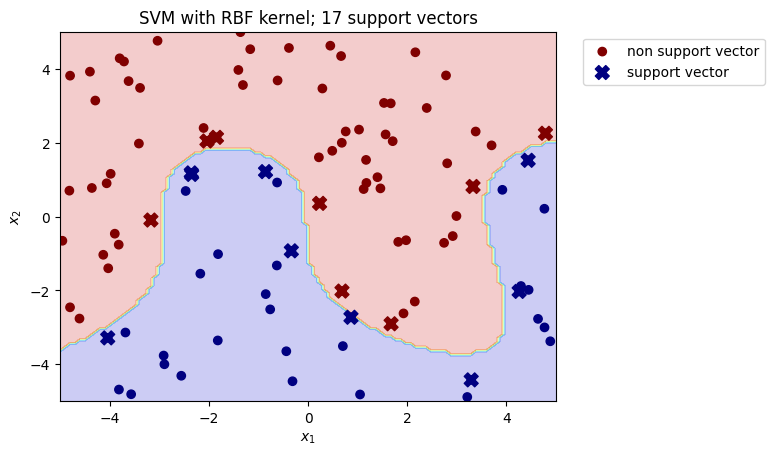

In [18]:
#12.
model = SVC(C = 100)
model.fit(df[df.dataset == 3][['x1','x2']], df[df.dataset == 3]['y'])
y_pred = model.predict(df[df.dataset == 3][['x1','x2']])

plot_svm_results(model,df[df.dataset == 3][['x1','x2']].values,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


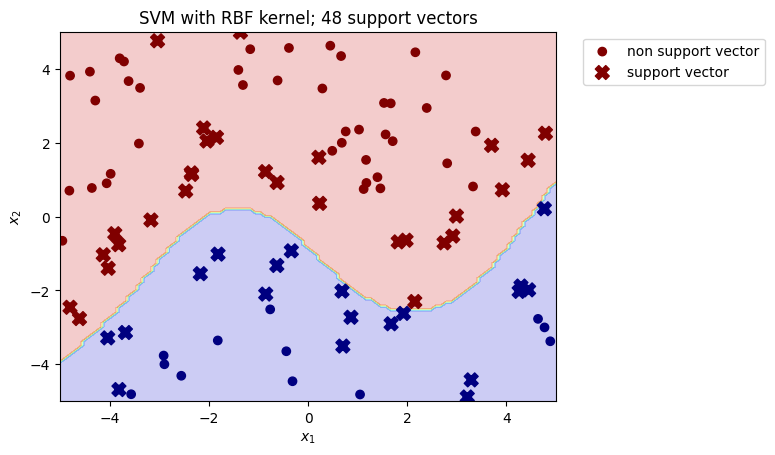

In [19]:
model = SVC(C = 1)
model.fit(df[df.dataset == 3][['x1','x2']], df[df.dataset == 3]['y'])
y_pred = model.predict(df[df.dataset == 3][['x1','x2']])

plot_svm_results(model,df[df.dataset == 3][['x1','x2']].values,y_pred)

We can see on those two plots that data are very accurately separated.
We have some support vectors for the model with C = 1 that should not be support vectors as they are fare from the border. It explains that we have a lower accuracy for the model with C = 1 than with C = 100.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


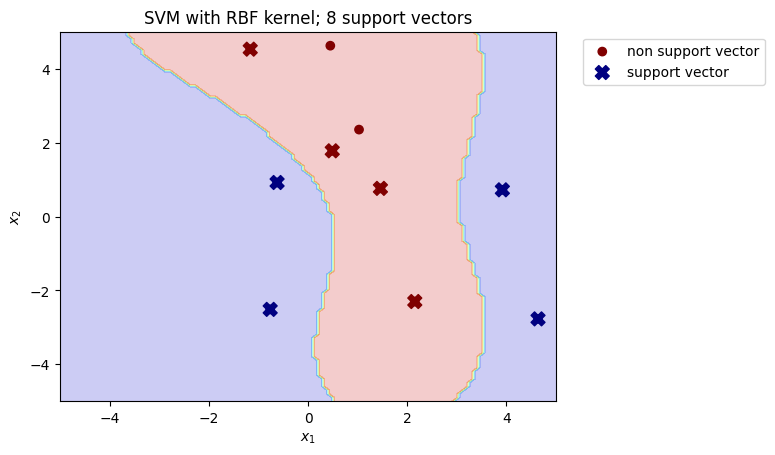

In [20]:
#13.
model = SVC(C = 100)
model.fit(df[df.dataset == 3][['x1','x2']].iloc[:10], df[df.dataset == 3]['y'].iloc[:10])
y_pred = model.predict(df[df.dataset == 3][['x1','x2']].iloc[:10])

plot_svm_results(model,df[df.dataset == 3][['x1','x2']].iloc[:10].values,y_pred)

We get 8 supports vectors whereas we got 17 support vectors for the whole dataset 3.

80% of the samples are support vectors.

As we take a few samples, most of the sample will be important to create the hyperplane so that is why we get a high number of support vectors.